In [77]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [78]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [79]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [81]:
train_data.drop(["PassengerId","Name","Ticket"],axis = 1,inplace = True)

In [82]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [83]:
for i in train_data:
    print("{} {}".format(i,len(train_data[i].unique())))

Survived 2
Pclass 3
Sex 2
Age 89
SibSp 7
Parch 7
Fare 248
Cabin 148
Embarked 4


In [84]:
train_data["Family_size"] = train_data.SibSp+train_data.Parch

In [85]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [86]:
train_data.drop(["SibSp","Parch"],axis = 1,inplace=True)

In [87]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size
0,0,3,male,22.0,7.2500,NaN,S,1
1,1,1,female,38.0,71.2833,C85,C,1
2,1,3,female,26.0,7.9250,NaN,S,0
3,1,1,female,35.0,53.1000,C123,S,1
4,0,3,male,35.0,8.0500,NaN,S,0


In [114]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [112]:
data = train_data.Sex.values

In [113]:
data

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [115]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data)
print(integer_encoded)

[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 1 1 1 

In [116]:
onehot_encoder = OneHotEncoder(sparse=False)


In [117]:
onehot_encoder

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<type 'numpy.float64'>, handle_unknown='error', n_values=None,
       sparse=False)

In [118]:
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)


In [119]:
integer_encoded

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [120]:
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [121]:
df = pd.DataFrame(onehot_encoded,columns=["female","male"])

In [122]:
df.head()

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [123]:
train_data["male"] = df.male

In [124]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size,male
0,0,3,male,22.0,7.2500,NaN,S,1,1.0
1,1,1,female,38.0,71.2833,C85,C,1,0.0
2,1,3,female,26.0,7.9250,NaN,S,0,0.0
3,1,1,female,35.0,53.1000,C123,S,1,0.0
4,0,3,male,35.0,8.0500,NaN,S,0,1.0


In [125]:
train_data.drop("Sex",axis = 1,inplace=True)

In [126]:
train_data.head()

,Survived,Pclass,Age,Fare,Cabin,Embarked,Family_size,male
0,0,3,22.0,7.2500,NaN,S,1,1.0
1,1,1,38.0,71.2833,C85,C,1,0.0
2,1,3,26.0,7.9250,NaN,S,0,0.0
3,1,1,35.0,53.1000,C123,S,1,0.0
4,0,3,35.0,8.0500,NaN,S,0,1.0


In [128]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [131]:
train_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [134]:
train_data[["Cabin","Survived"]].head(150)

,Cabin,Survived
0,NaN,0
1,C85,1
2,NaN,1
3,C123,1
4,NaN,0
5,NaN,0
6,E46,0
7,NaN,0
8,NaN,1
9,NaN,1


In [136]:
train_data.Cabin.fillna("N",inplace=True)

In [139]:
train_data["Cabin_la"] = train_data.Cabin.str[:1]

In [141]:
train_data.Cabin_la.unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

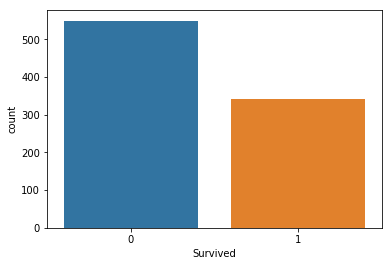

In [148]:
sns.countplot(train_data.Survived)

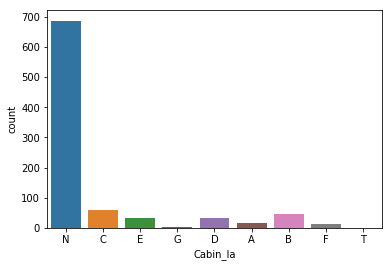

In [154]:
sns.countplot(train_data.Cabin_la)

In [157]:
train_data.Cabin_la = np.where(train_data.Cabin_la == "N","U",train_data.Cabin_la)

In [159]:
train_data.Cabin_la.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [160]:
ca = train_data.Cabin_la.values

In [169]:
ca[23]

'A'

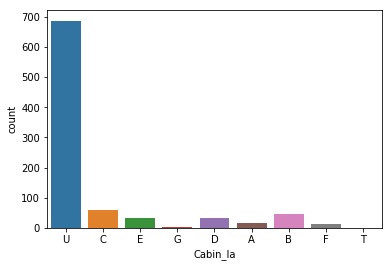

In [162]:
sns.countplot(train_data.Cabin_la)

In [165]:
cal = label_encoder.fit_transform(ca)

In [170]:
cal[23]

0

In [171]:
train_data.Cabin_la = cal

In [172]:
train_data.head()

,Survived,Pclass,Age,Fare,Cabin,Embarked,Family_size,male,Cabin_la
0,0,3,22.0,7.2500,N,S,1,1.0,8
1,1,1,38.0,71.2833,C85,C,1,0.0,2
2,1,3,26.0,7.9250,N,S,0,0.0,8
3,1,1,35.0,53.1000,C123,S,1,0.0,2
4,0,3,35.0,8.0500,N,S,0,1.0,8


In [173]:
train_data.drop("Cabin",axis = 1, inplace=True)

In [174]:
train_data.head()


,Survived,Pclass,Age,Fare,Embarked,Family_size,male,Cabin_la
0,0,3,22.0,7.2500,S,1,1.0,8
1,1,1,38.0,71.2833,C,1,0.0,2
2,1,3,26.0,7.9250,S,0,0.0,8
3,1,1,35.0,53.1000,S,1,0.0,2
4,0,3,35.0,8.0500,S,0,1.0,8


In [175]:
train_data.isna().sum()

Survived         0
Pclass           0
Age            177
Fare             0
Embarked         2
Family_size      0
male             0
Cabin_la         0
dtype: int64

In [176]:
train_data[["Age","Survived"]]

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
5,NaN,0
6,54.0,0
7,2.0,0
8,27.0,1
9,14.0,1


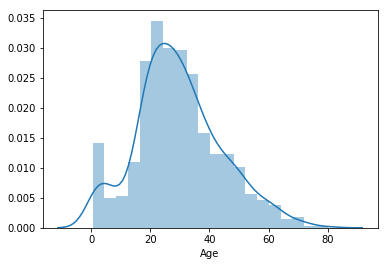

In [177]:
sns.distplot(train_data.Age)

In [180]:
train_data.Age.fillna(train_data.Age.mean(),inplace=True)

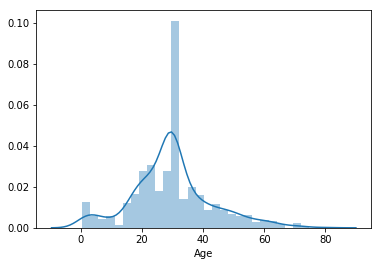

In [181]:
sns.distplot(train_data.Age)

In [182]:
train_data.isna().sum()

Survived       0
Pclass         0
Age            0
Fare           0
Embarked       2
Family_size    0
male           0
Cabin_la       0
dtype: int64

In [184]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

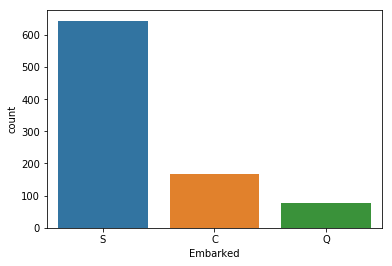

In [189]:
sns.countplot(train_data.Embarked)

In [190]:
train_data.loc[train_data.Embarked.isnull()]

,Survived,Pclass,Age,Fare,Embarked,Family_size,male,Cabin_la
61,1,1,38.0,80.0,NaN,0,0.0,1
829,1,1,62.0,80.0,NaN,0,0.0,1


In [193]:
train_data.Embarked.fillna("C",inplace=True)

In [197]:
train_data.iloc[829]

Survived        1
Pclass          1
Age            62
Fare           80
Embarked        C
Family_size     0
male            0
Cabin_la        1
Name: 829, dtype: object

In [198]:
em = train_data.Embarked.values

In [199]:
em

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'C', 'S', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S

In [200]:
eml = label_encoder.fit_transform(em)

In [201]:
eml

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [202]:
eml = eml.reshape(len(eml), 1)

In [203]:
eml

array([[2],
       [0],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [1],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [0],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
    

In [204]:
emoh = onehot_encoder.fit_transform(eml)

In [205]:
emoh

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [209]:
df = pd.DataFrame(emoh,columns=["C","Q","S"])

In [210]:
df

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


In [211]:
train_data["S"] = df.S

In [212]:
train_data["Q"] = df.Q

In [213]:
train_data.head()

,Survived,Pclass,Age,Fare,Embarked,Family_size,male,Cabin_la,S,Q
0,0,3,22.0,7.2500,S,1,1.0,8,1.0,0.0
1,1,1,38.0,71.2833,C,1,0.0,2,0.0,0.0
2,1,3,26.0,7.9250,S,0,0.0,8,1.0,0.0
3,1,1,35.0,53.1000,S,1,0.0,2,1.0,0.0
4,0,3,35.0,8.0500,S,0,1.0,8,1.0,0.0


In [ ]:
train_data.drop("Embarked",inplace=True,axis = 1)

In [215]:
train_data.head()

,Survived,Pclass,Age,Fare,Family_size,male,Cabin_la,S,Q
0,0,3,22.0,7.2500,1,1.0,8,1.0,0.0
1,1,1,38.0,71.2833,1,0.0,2,0.0,0.0
2,1,3,26.0,7.9250,0,0.0,8,1.0,0.0
3,1,1,35.0,53.1000,1,0.0,2,1.0,0.0
4,0,3,35.0,8.0500,0,1.0,8,1.0,0.0


In [333]:
from sklearn.preprocessing import StandardScaler

In [334]:
scalar = StandardScaler()

In [336]:
X = train_data.iloc[:,1:]

In [337]:
train_data_scaled = scalar.fit_transform(X)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [339]:
train_data_scaled = pd.DataFrame(train_data_scaled)

In [340]:
train_data_scaled

,0,1,2,3,4,5,6,7
0,0.827377,-0.592481,-0.502445,0.059160,0.737695,0.522067,0.619306,-0.307562
1,-1.566107,0.638789,0.786845,0.059160,-1.355574,-1.917594,-1.614710,-0.307562
2,0.827377,-0.284663,-0.488854,-0.560975,-1.355574,0.522067,0.619306,-0.307562
3,-1.566107,0.407926,0.420730,0.059160,-1.355574,-1.917594,0.619306,-0.307562
4,0.827377,0.407926,-0.486337,-0.560975,0.737695,0.522067,0.619306,-0.307562
5,0.827377,0.000000,-0.478116,-0.560975,0.737695,0.522067,-1.614710,3.251373
6,-1.566107,1.870059,0.395814,-0.560975,0.737695,-1.104373,0.619306,-0.307562
7,0.827377,-2.131568,-0.224083,1.919564,0.737695,0.522067,0.619306,-0.307562
8,0.827377,-0.207709,-0.424256,0.679295,-1.355574,0.522067,0.619306,-0.307562
9,-0.369365,-1.208115,-0.042956,0.059160,-1.355574,0.522067,-1.614710,-0.307562


In [341]:
X = train_data_scaled.values

In [342]:
X

array([[ 0.82737724, -0.5924806 , -0.50244517, ...,  0.52206745,
         0.61930636, -0.30756234],
       [-1.56610693,  0.63878901,  0.78684529, ..., -1.91759389,
        -1.61470971, -0.30756234],
       [ 0.82737724, -0.2846632 , -0.48885426, ...,  0.52206745,
         0.61930636, -0.30756234],
       ...,
       [ 0.82737724,  0.        , -0.17626324, ...,  0.52206745,
         0.61930636, -0.30756234],
       [-1.56610693, -0.2846632 , -0.04438104, ..., -1.91759389,
        -1.61470971, -0.30756234],
       [ 0.82737724,  0.17706291, -0.49237783, ...,  0.52206745,
        -1.61470971,  3.25137334]])

In [343]:
X.shape

(891, 8)

In [344]:
y = train_data.Survived.values

In [345]:
y.shape

(891,)

In [346]:
from sklearn.model_selection import train_test_split

In [347]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [348]:
lr = LogisticRegression(C=100)

In [349]:
lr.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [350]:
lr.score(X_train,y_train)

0.8083832335329342

In [351]:
lr.score(X_test,y_test)

0.7623318385650224

In [352]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [353]:
y_pred = lr.predict(X_test)

In [354]:
accuracy_score(y_test,y_pred)

0.7623318385650224

In [355]:
confusion_matrix(y_test,lr.predict(X_test))

array([[109,  27],
       [ 26,  61]])

In [356]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       136
           1       0.69      0.70      0.70        87

   micro avg       0.76      0.76      0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



In [357]:
dt = DecisionTreeClassifier(max_depth=6)

In [358]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [359]:
dt.score(X_train,y_train)

0.8847305389221557

In [360]:
dt.score(X_test,y_test)

0.8295964125560538

In [361]:
accuracy_score(y_test,dt.predict(X_test))

0.8295964125560538

In [362]:
confusion_matrix(y_test,dt.predict(X_test))

array([[126,  10],
       [ 28,  59]])

In [363]:
print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.68      0.76        87

   micro avg       0.83      0.83      0.83       223
   macro avg       0.84      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



In [364]:
rf = RandomForestClassifier(max_depth=6)

In [365]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [366]:
rf.score(X_train,y_train)

0.8682634730538922

In [367]:
rf.score(X_test,y_test)

0.8026905829596412

In [368]:
accuracy_score(y_test,rf.predict(X_test))

0.8026905829596412

In [369]:
confusion_matrix(y_test,rf.predict(X_test))

array([[122,  14],
       [ 30,  57]])

In [370]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       136
           1       0.80      0.66      0.72        87

   micro avg       0.80      0.80      0.80       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [249]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [250]:
test_data.drop(["PassengerId","Name","Ticket"],axis = 1,inplace=True)

In [251]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [252]:
test_data["Family_size"] = test_data.SibSp+test_data.Parch

In [253]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size
0,3,male,34.5,0,0,7.8292,NaN,Q,0
1,3,female,47.0,1,0,7.0000,NaN,S,1
2,2,male,62.0,0,0,9.6875,NaN,Q,0
3,3,male,27.0,0,0,8.6625,NaN,S,0
4,3,female,22.0,1,1,12.2875,NaN,S,2


In [254]:
test_data.drop(["SibSp","Parch"],axis = 1,inplace=True)

In [255]:
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size
0,3,male,34.5,7.8292,NaN,Q,0
1,3,female,47.0,7.0000,NaN,S,1
2,2,male,62.0,9.6875,NaN,Q,0
3,3,male,27.0,8.6625,NaN,S,0
4,3,female,22.0,12.2875,NaN,S,2


In [256]:
sexdata = test_data.Sex.values

In [257]:
sexdata

array(['male', 'female', 'male', 'male', 'female', 'male', 'female',
       'male', 'female', 'male', 'male', 'male', 'female', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'male', 'female', 'female',
       'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male',
       'male', 'female', 'male', 'male', 'male', 'female', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'female', 'female', 'male', 'female', 'male', 'female', 'male',
       'male', 'male', 'female', 'male', 'female', 'male', 'female',
       'male',

In [258]:
sex_integer_encoded = label_encoder.fit_transform(sexdata)
print(sex_integer_encoded)

[1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0
 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0
 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 1 0 1 1 1]


In [259]:
sex_integer_encoded = sex_integer_encoded.reshape(len(sex_integer_encoded), 1)

In [260]:
sex_integer_encoded

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [261]:
sex_onehot_encoded = onehot_encoder.fit_transform(sex_integer_encoded)
dfsex = pd.DataFrame(sex_onehot_encoded,columns=["female","male"])

In [262]:
test_data["male"] = dfsex.male

In [263]:
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size,male
0,3,male,34.5,7.8292,NaN,Q,0,1.0
1,3,female,47.0,7.0000,NaN,S,1,0.0
2,2,male,62.0,9.6875,NaN,Q,0,1.0
3,3,male,27.0,8.6625,NaN,S,0,1.0
4,3,female,22.0,12.2875,NaN,S,2,0.0


In [264]:
test_data.drop("Sex",axis = 1,inplace=True)

In [265]:
test_data.head()

,Pclass,Age,Fare,Cabin,Embarked,Family_size,male
0,3,34.5,7.8292,NaN,Q,0,1.0
1,3,47.0,7.0000,NaN,S,1,0.0
2,2,62.0,9.6875,NaN,Q,0,1.0
3,3,27.0,8.6625,NaN,S,0,1.0
4,3,22.0,12.2875,NaN,S,2,0.0


In [266]:
test_data.Cabin.fillna("U",inplace=True)

In [267]:
test_data.head()

,Pclass,Age,Fare,Cabin,Embarked,Family_size,male
0,3,34.5,7.8292,U,Q,0,1.0
1,3,47.0,7.0000,U,S,1,0.0
2,2,62.0,9.6875,U,Q,0,1.0
3,3,27.0,8.6625,U,S,0,1.0
4,3,22.0,12.2875,U,S,2,0.0


In [270]:
test_data["Cabin_la"] = test_data.Cabin.str[:1]

In [271]:
test_data.head()

,Pclass,Age,Fare,Cabin,Embarked,Family_size,male,Cabin_la
0,3,34.5,7.8292,U,Q,0,1.0,U
1,3,47.0,7.0000,U,S,1,0.0,U
2,2,62.0,9.6875,U,Q,0,1.0,U
3,3,27.0,8.6625,U,S,0,1.0,U
4,3,22.0,12.2875,U,S,2,0.0,U


In [272]:
test_data.Cabin_la.unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [273]:
cat = test_data.Cabin_la.values

In [286]:
cat[0]="U"

In [281]:
cat

array(['T', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'B',
       'U', 'E', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'B', 'U',
       'B', 'U', 'A', 'U', 'U', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'U',
       'U', 'U', 'D', 'U', 'U', 'D', 'U', 'A', 'U', 'D', 'U', 'C', 'U',
       'U', 'C', 'U', 'U', 'U', 'F', 'U', 'B', 'U', 'U', 'U', 'U', 'B',
       'U', 'U', 'U', 'C', 'C', 'U', 'U', 'U', 'D', 'C', 'C', 'U', 'C',
       'U', 'U', 'U', 'C', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U',
       'U', 'B', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'C', 'U', 'U', 'U',
       'U', 'U', 'U', 'U', 'U', 'F', 'U', 'U', 'A', 'U', 'C', 'U', 'U',
       'G', 'C', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'U', 'U', 'U', 'U',
       'U', 'C', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'B',
       'U', 'U', 'U', 'E', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'U', 'U',
       'C', 'U', 'D', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'B', 'U', 'U',
       'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C', 'F', 'E', 'U

In [285]:
catl = label_encoder.fit_transform(cat)

In [287]:
catl = catl.reshape(len(catl),1)

In [290]:
catl[0] = [8]

In [291]:
catl

array([[8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [1],
       [8],
       [4],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [1],
       [8],
       [1],
       [8],
       [0],
       [8],
       [8],
       [8],
       [8],
       [8],
       [2],
       [8],
       [8],
       [8],
       [8],
       [8],
       [8],
       [3],
       [8],
       [8],
       [3],
       [8],
       [0],
       [8],
       [3],
       [8],
       [2],
       [8],
       [8],
       [2],
       [8],
       [8],
       [8],
       [5],
       [8],
       [1],
       [8],
       [8],
       [8],
       [8],
       [1],
       [8],
       [8],
       [8],
       [2],
       [2],
       [8],
       [8],
       [8],
       [3],
       [2],
       [2],
       [8],
       [2],
       [8],
       [8],
       [8],
       [2],
       [8],
    

In [294]:
test_data.Cabin_la = catl

In [295]:
test_data.head()

,Pclass,Age,Fare,Cabin,Embarked,Family_size,male,Cabin_la
0,3,34.5,7.8292,U,Q,0,1.0,8
1,3,47.0,7.0000,U,S,1,0.0,8
2,2,62.0,9.6875,U,Q,0,1.0,8
3,3,27.0,8.6625,U,S,0,1.0,8
4,3,22.0,12.2875,U,S,2,0.0,8


In [296]:
test_data.drop("Cabin",axis = 1,inplace = True)

In [297]:
test_data.head()

,Pclass,Age,Fare,Embarked,Family_size,male,Cabin_la
0,3,34.5,7.8292,Q,0,1.0,8
1,3,47.0,7.0000,S,1,0.0,8
2,2,62.0,9.6875,Q,0,1.0,8
3,3,27.0,8.6625,S,0,1.0,8
4,3,22.0,12.2875,S,2,0.0,8


In [298]:
test_data.isna().sum()

Pclass          0
Age            86
Fare            1
Embarked        0
Family_size     0
male            0
Cabin_la        0
dtype: int64

In [300]:
test_data.Age.fillna(test_data.Age.mean(),inplace=True)

In [301]:
test_data.isna().sum()

Pclass         0
Age            0
Fare           1
Embarked       0
Family_size    0
male           0
Cabin_la       0
dtype: int64

In [302]:
test_data.loc[test_data.Fare.isnull()]

,Pclass,Age,Fare,Embarked,Family_size,male,Cabin_la
152,3,60.5,NaN,S,0,1.0,8


In [304]:
test_data.Fare.fillna(7.0,inplace=True)

In [305]:
test_data.iloc[152]

Pclass            3
Age            60.5
Fare              7
Embarked          S
Family_size       0
male              1
Cabin_la          8
Name: 152, dtype: object

In [306]:
test_data.isna().sum()

Pclass         0
Age            0
Fare           0
Embarked       0
Family_size    0
male           0
Cabin_la       0
dtype: int64

In [307]:
test_data.head()

,Pclass,Age,Fare,Embarked,Family_size,male,Cabin_la
0,3,34.5,7.8292,Q,0,1.0,8
1,3,47.0,7.0000,S,1,0.0,8
2,2,62.0,9.6875,Q,0,1.0,8
3,3,27.0,8.6625,S,0,1.0,8
4,3,22.0,12.2875,S,2,0.0,8


In [308]:
em = test_data.Embarked.values

In [309]:
eml = label_encoder.fit_transform(em)

In [310]:
eml

array([1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2,
       0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2,

In [311]:
eml = eml.reshape(len(eml),1)

In [312]:
eml

array([[1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [2],
       [2],
       [0],
       [0],
       [2],
       [0],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [1],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [1],
       [0],
       [2],
       [1],
       [2],
       [0],
       [2],
       [1],
       [2],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [1],
       [0],
       [2],
       [2],
    

In [313]:
emlohe = onehot_encoder.fit_transform(eml)

In [314]:
emlohe

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [315]:
dfem = pd.DataFrame(emlohe,columns=["C","Q","S"])

In [316]:
test_data["S"] = dfem.S

In [317]:
test_data["Q"] = dfem.Q

In [318]:
test_data.head()

,Pclass,Age,Fare,Embarked,Family_size,male,Cabin_la,S,Q
0,3,34.5,7.8292,Q,0,1.0,8,0.0,1.0
1,3,47.0,7.0000,S,1,0.0,8,1.0,0.0
2,2,62.0,9.6875,Q,0,1.0,8,0.0,1.0
3,3,27.0,8.6625,S,0,1.0,8,1.0,0.0
4,3,22.0,12.2875,S,2,0.0,8,1.0,0.0


In [319]:
test_data.drop("Embarked",axis = 1,inplace=True)

In [320]:
test_data.head()

,Pclass,Age,Fare,Family_size,male,Cabin_la,S,Q
0,3,34.5,7.8292,0,1.0,8,0.0,1.0
1,3,47.0,7.0000,1,0.0,8,1.0,0.0
2,2,62.0,9.6875,0,1.0,8,0.0,1.0
3,3,27.0,8.6625,0,1.0,8,1.0,0.0
4,3,22.0,12.2875,2,0.0,8,1.0,0.0


In [321]:
X = test_data.values

In [322]:
y = rf.predict(X)

In [323]:
y

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [324]:
dt = pd.DataFrame(data=y, columns=["Survived"])

In [325]:
dt

,Survived
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [326]:
test_data2 = pd.read_csv('test.csv')

In [327]:
a = test_data2.PassengerId.values

In [328]:
dt1 = pd.DataFrame(data = a, columns = ["PassengerId"])

In [329]:
dt2 = pd.concat([dt1,dt],axis = 1)

In [332]:
dt2.to_csv("submission2.csv",index=False)

In [331]:
dt2.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
